# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

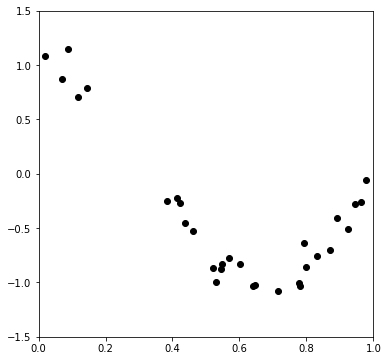

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Podziel dane na dwie grupy.

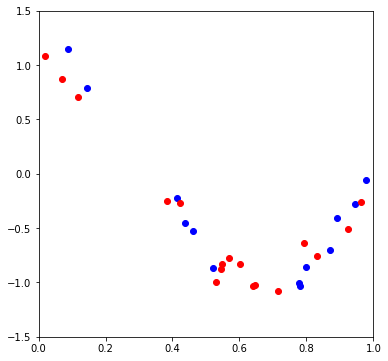

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:
* liniową


In [24]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

In [26]:
model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model2.fit(np.vstack(X2), y2)

r2_1 = metrics.r2_score(y2, model1.predict(np.vstack(X2)))
r2_2 = metrics.r2_score(y1, model2.predict(np.vstack(X1)))

print(r2_1)
print(r2_2)

0.4405716416224197
0.2579309122925387


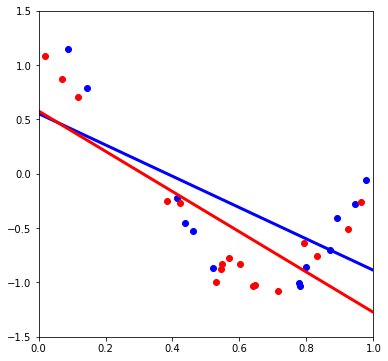

In [27]:
x_tr = np.linspace(0, 3, 200)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(x_tr, model1.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(x_tr, model2.predict(np.vstack(x_tr)), color='red',linewidth=3)

x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $4$


In [41]:
model1 = make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression())
model2.fit(np.vstack(X2), y2)

r2_1 = metrics.r2_score(y2, model1.predict(np.vstack(X2)))
r2_2 = metrics.r2_score(y1, model2.predict(np.vstack(X1)))

print(r2_1)
print(r2_2)

0.6652276019842724
0.8029340688898363


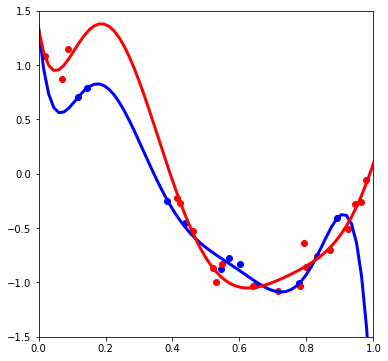

In [42]:
x_tr = np.linspace(0, 3, 200)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(x_tr, model1.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(x_tr, model2.predict(np.vstack(x_tr)), color='red',linewidth=3)

x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $15$


In [45]:
r2_array_1 = []
r2_array_2 = []

for i in range(100):
    s=np.random.random_sample(n_samples)
    s[s>0.5]=1
    s[s<=0.5]=0
    s
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    
    model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
    model1.fit(np.vstack(X1), y1)

    model2 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
    model2.fit(np.vstack(X2), y2)

    r2_array_1.append(metrics.r2_score(y2, model1.predict(np.vstack(X2))))
    r2_array_1.append(metrics.r2_score(y1, model2.predict(np.vstack(X1))))
    

    model1 = make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression())
    model1.fit(np.vstack(X1), y1)

    model2 = make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression())
    model2.fit(np.vstack(X2), y2)

    r2_array_2.append(metrics.r2_score(y2, model1.predict(np.vstack(X2))))
    r2_array_2.append(metrics.r2_score(y1, model2.predict(np.vstack(X1))))    

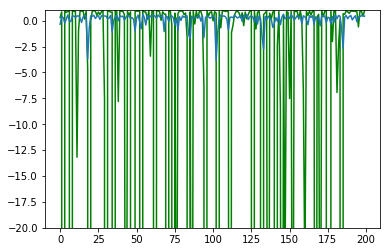

In [46]:
plt.plot(r2_array_2, "green")
plt.ylim(-20,1)
plt.plot(r2_array_1)
plt.show()